In [16]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [3]:
diabetes =pd.read_csv('diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data=diabetes.copy()

In [42]:
quantatitive_variable_list=[]
for v in data.columns:
    l=data[v].unique()
    if len(l) >= 10:
        quantatitive_variable_list.append(v)
catigorical_variable_list=[]
for v in data.columns:
    l=data[v].unique()
    if len(l) <10:
        catigorical_variable_list.append(v)        

In [43]:
print quantatitive_variable_list
print catigorical_variable_list

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
['Outcome']


In [13]:
# catigorical_variable_list=catigorical_variable_list[0]

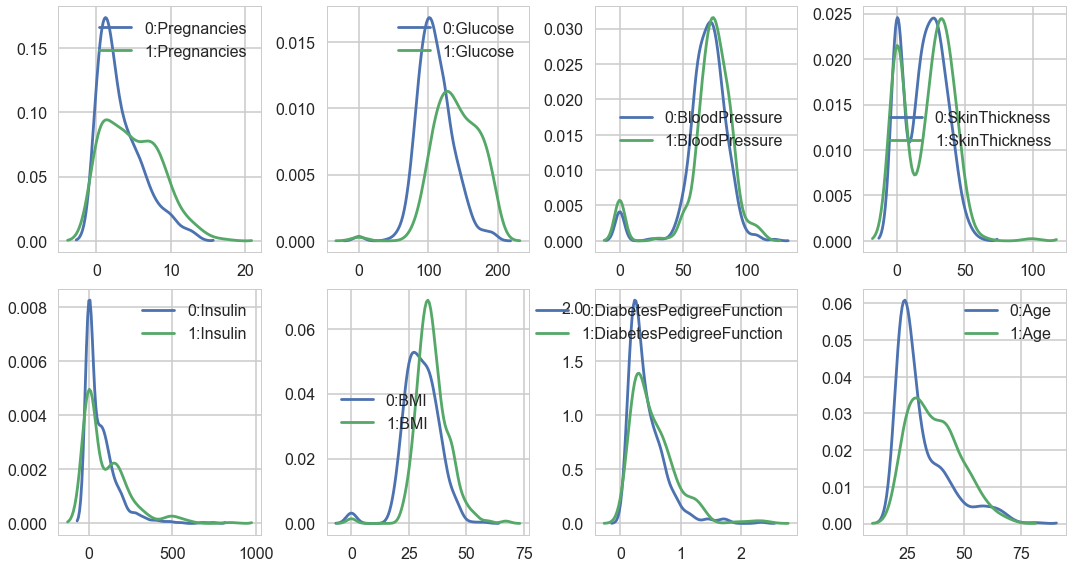

In [44]:
dfgb=data.groupby('Outcome')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), quantatitive_variable_list):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)
plt.savefig('Univariate Analysis Quantatitive Variable')
plt.show()

In [22]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 105), 
#                          tight_layout=True)

# for ax, p in zip(axes.ravel(), catigorical_variable_list): 
#     table=pd.crosstab(data[p],data['QuoteConversion_Flag'])
#     table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax,stacked='True')
# plt.savefig('Univariate Analysis Categorical Variable')
# plt.show()

In [45]:
# %matplotlib inline
# table=pd.crosstab(data.Pregnancies,data.Outcome)
# table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked='True')
# plt.title('Stacked Bar Chart of Pregnancies vs Outcome')
# plt.xlabel('Pregnancies')
# plt.ylabel('Proportion of Outcome 1')
# plt.savefig('Prg_vs_Otc_stack')

In [46]:
quantatitive_variables=quantatitive_variable_list
categorical_variables=catigorical_variable_list

In [47]:
data.to_csv('data.csv')

In [48]:
data2=data.copy()

In [49]:
y=data2['Outcome']

In [50]:
categorical_variables

['Outcome']

In [51]:
data2=data2[quantatitive_variables]

### Building Models

In [52]:
def cv_optimize(clf, parameters, X_train, y_train,  n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters,  cv=n_folds)
    gs.fit(X_train, y_train)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    clf = gs.best_estimator_
    clf=clf.fit(X_train, y_train)
    training_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(y_test, clf.predict(X_test))
    print "########################################################"
    return clf

In [ ]:
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

# rfe = RFE(logreg, 30)
# rfe = rfe.fit(X, y )
# print(rfe.support_)
# print(rfe.ranking_)

In [56]:
X=data2

In [57]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 02 Feb 2018   Pseudo R-squ.:                 0.05922
Time:                        14:53:50   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000         0.0

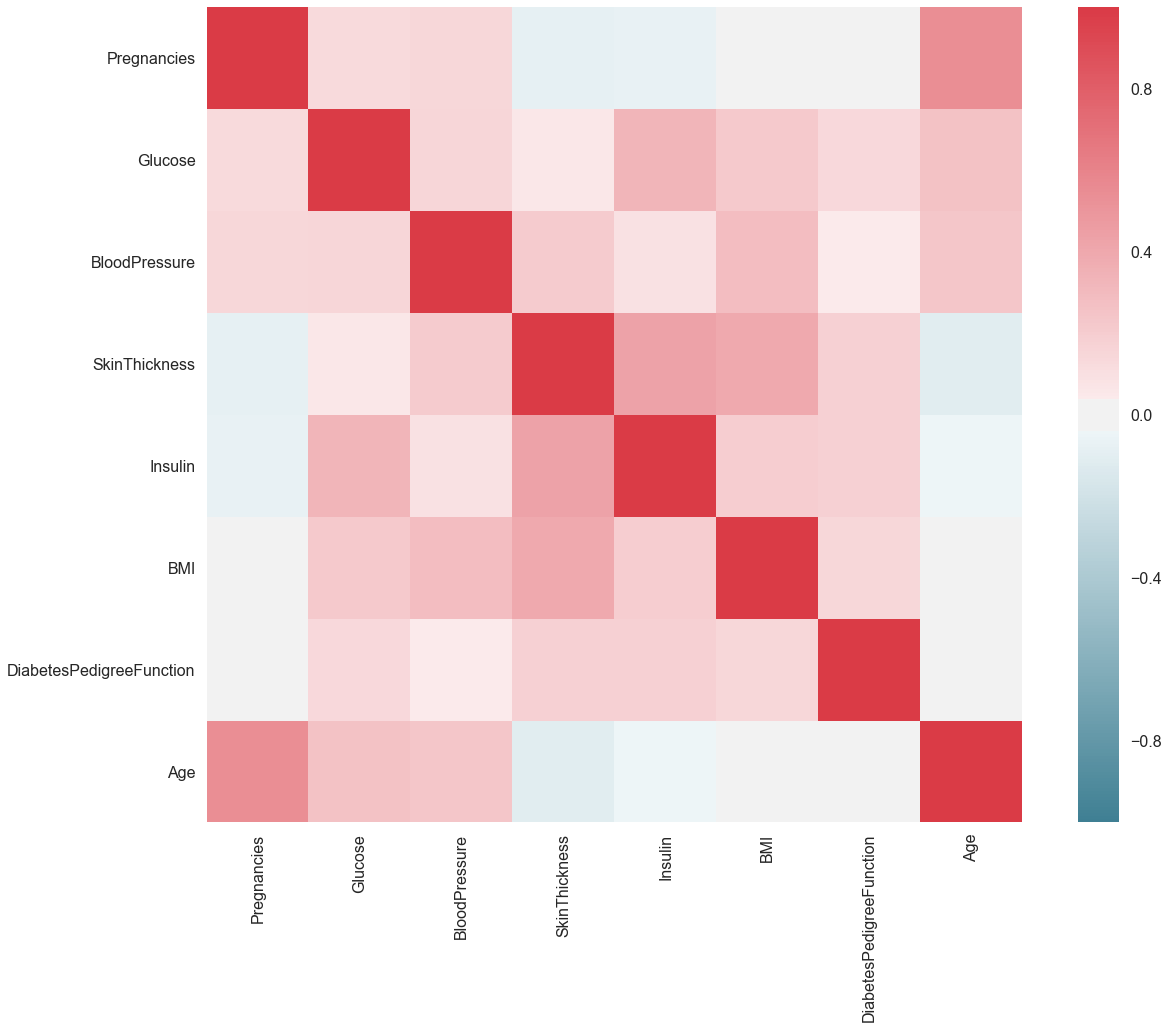

In [59]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

#### Train test split

In [60]:
X=data2.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Lasso regression & importance 

#### Run model

In [61]:
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.0001, 0.01, 0.1, 1, 10, 100,1000]}
clf_l1=cv_optimize(logclf,c,X_train,y_train,score_func='f1')

C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


BEST {'C': 1} 0.624148207794 [mean: 0.00000, std: 0.00000, params: {'C': 0.0001}, mean: 0.35601, std: 0.04690, params: {'C': 0.01}, mean: 0.55435, std: 0.05979, params: {'C': 0.1}, mean: 0.62415, std: 0.04042, params: {'C': 1}, mean: 0.61967, std: 0.04390, params: {'C': 10}, mean: 0.61967, std: 0.04390, params: {'C': 100}, mean: 0.61967, std: 0.04390, params: {'C': 1000}]
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.78
[[141  16]
 [ 34  40]]
########################################################


#### Feature selection 

Non zero lasso features¶
We write a function nonzero_lasso which takes the fit classifier clfloglasso as an argument, and spits out a dataframe of coefficients, sorted by the absolute magnitude of the coefficients. This way we can see which features dominated the logistic regression.

In [63]:
def nonzero_lasso(clf,col):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=col, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [65]:
lasso_importances=nonzero_lasso(clf_l1,data2.columns)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,abscoef,coef
feature,,
DiabetesPedigreeFunction,0.603415,0.603415
Pregnancies,0.083463,0.083463
BMI,0.081458,0.081458
Glucose,0.032289,0.032289
Age,0.022594,0.022594


#### Feature importance using correlations

We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns abscorr the absolute value of the correlation and corr the value of the correlation. Sort the dataframe by abscorr, highest first, and show the top 25 features with the highest absolute correlation. Is there much overlap with the feature selection performed by the LASSO?

In [68]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=data2
for col in dftousetrain.columns.values:
    r=pearsonr(dftousetrain[col].values, y)[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscorr,corr
feature,,
Glucose,0.466581,0.466581
BMI,0.292695,0.292695
Age,0.238356,0.238356
Pregnancies,0.221898,0.221898
DiabetesPedigreeFunction,0.173844,0.173844
Insulin,0.130548,0.130548
SkinThickness,0.074752,0.074752
BloodPressure,0.065068,0.065068


### Ridge Regression L2

In [69]:
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.0001, 0.01, 0.1, 1, 10, 100,1000]}
clf_l2=cv_optimize(logclf,c,X_train,y_train,score_func='f1')

BEST {'C': 10} 0.619668595977 [mean: 0.32424, std: 0.05182, params: {'C': 0.0001}, mean: 0.43644, std: 0.04560, params: {'C': 0.01}, mean: 0.50667, std: 0.03760, params: {'C': 0.1}, mean: 0.60848, std: 0.04655, params: {'C': 1}, mean: 0.61967, std: 0.04390, params: {'C': 10}, mean: 0.61967, std: 0.04390, params: {'C': 100}, mean: 0.61967, std: 0.04390, params: {'C': 1000}]
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.78
[[141  16]
 [ 34  40]]
########################################################


### KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
parameters={'n_neighbors':range(2,6)}
clf_cnn=cv_optimize(clf,parameters,X_train,y_train,score_func='f1')

BEST {'n_neighbors': 5} 0.582034153152 [mean: 0.44654, std: 0.05578, params: {'n_neighbors': 2}, mean: 0.54786, std: 0.01617, params: {'n_neighbors': 3}, mean: 0.51429, std: 0.05078, params: {'n_neighbors': 4}, mean: 0.58203, std: 0.06683, params: {'n_neighbors': 5}]
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.75
[[134  23]
 [ 35  39]]
########################################################


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train,y_train,score_func='f1')

BEST {'n_estimators': 5, 'max_depth': 8, 'min_samples_leaf': 5} 0.664918932085 [mean: 0.55697, std: 0.11912, params: {'n_estimators': 1, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.60152, std: 0.09414, params: {'n_estimators': 2, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.57674, std: 0.10848, params: {'n_estimators': 3, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.54156, std: 0.09735, params: {'n_estimators': 4, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.57866, std: 0.09845, params: {'n_estimators': 5, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.57620, std: 0.08716, params: {'n_estimators': 6, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.59940, std: 0.04652, params: {'n_estimators': 7, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.56091, std: 0.07874, params: {'n_estimators': 8, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.59112, std: 0.10247, params: {'n_estimators': 9, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.46912, std: 0.17618, params: {'n_estima

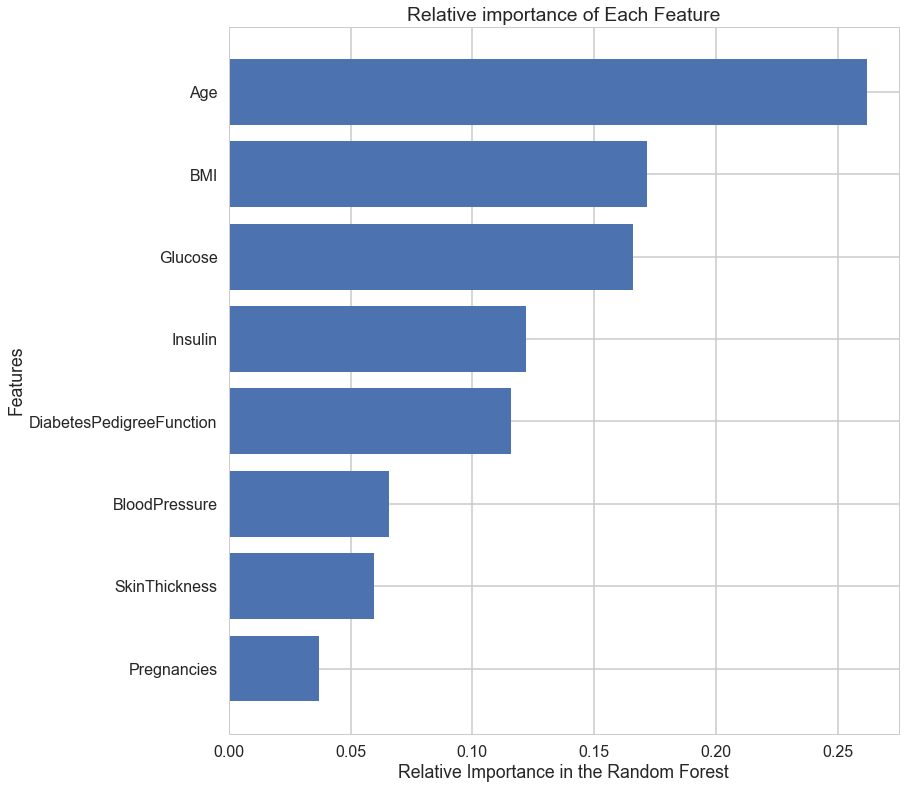

In [72]:
plt.figure(num=None, figsize=(12, 13))
importance_list = clf_rf.feature_importances_
name_list = data2.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

### Linear SVC

In [88]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train,y_train,score_func='f1')

BEST {'C': 0.1} 0.423594674972 [mean: 0.25559, std: 0.05813, params: {'C': 0.001}, mean: 0.28175, std: 0.13116, params: {'C': 0.01}, mean: 0.42359, std: 0.21544, params: {'C': 0.1}, mean: 0.15438, std: 0.19922, params: {'C': 1.0}, mean: 0.16748, std: 0.23148, params: {'C': 10.0}, mean: 0.28154, std: 0.26034, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.64
Accuracy on test data:     0.68
[[157   0]
 [ 74   0]]
########################################################


In [92]:
def cv_optimize_2(clf, parameters, X_train, y_train,  n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters,  cv=n_folds)
    gs.fit(X_train, y_train)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    clf = gs.best_estimator_
    clf=clf.fit(X_train, y_train)
    training_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
#     print confusion_matrix(y_test, clf.predict(X_test))

    forest_cm = confusion_matrix(y_test, clf.predict(X_test), [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title('Random Forest')
    plt.savefig('random_forest')
    print "########################################################"
    return clf

In [ ]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize_2(clfsvm,c_grid,X_train,y_train,score_func='f1')

In [79]:
# plt.scatter(data2['Age'],data2['BloodPressure'])

# Sample code

In [94]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [99]:
print diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64


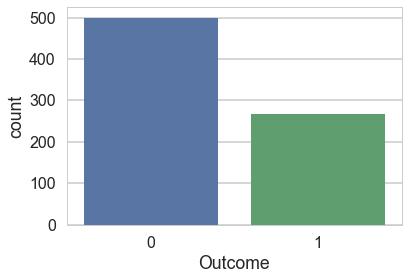

In [100]:
sns.countplot(diabetes['Outcome'],label="Count")

In [102]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


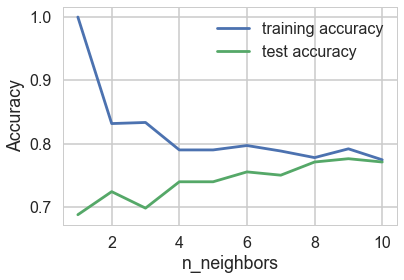

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [105]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.781
Test set score: 0.771


In [110]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.700
Test set accuracy: 0.703


In [111]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.785
Test set accuracy: 0.766


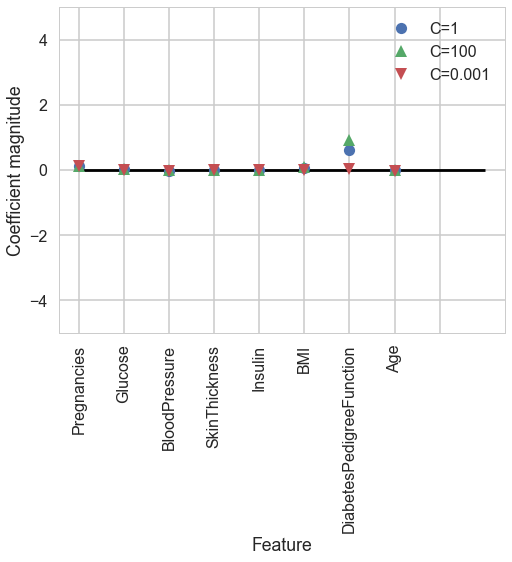

In [112]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

#### Decistin Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [114]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


In [115]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.04554275  0.6830362   0.          0.          0.          0.27142106
  0.          0.        ]


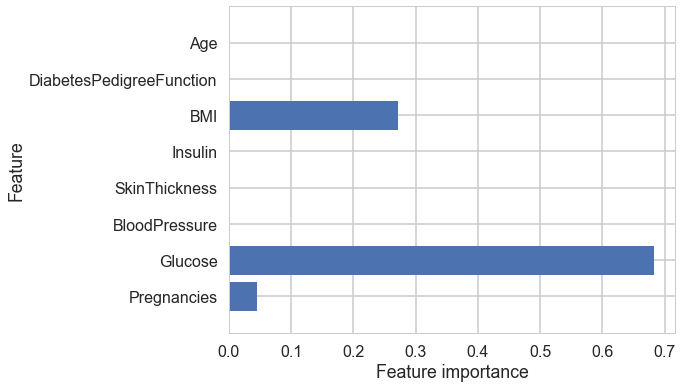

In [116]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

#### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [118]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


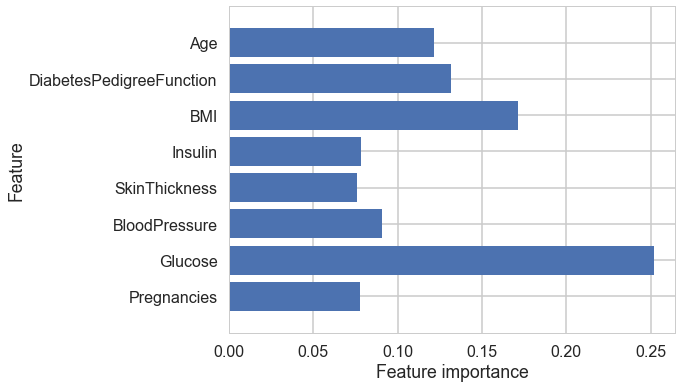

In [119]:
plot_feature_importances_diabetes(rf)

#### Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


In [121]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781


In [122]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.802
Accuracy on test set: 0.776


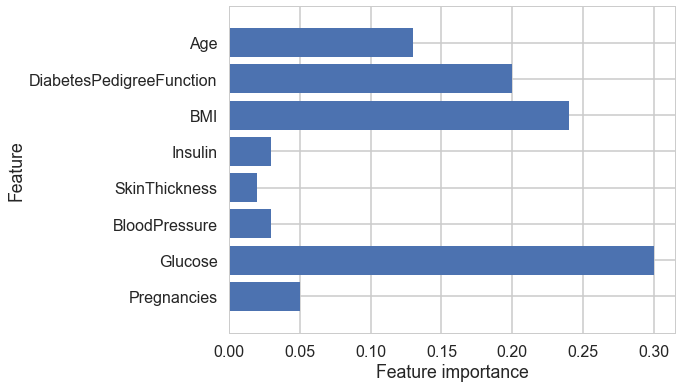

In [123]:
plot_feature_importances_diabetes(gb1)

### Support Vector Machine

In [124]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


In [126]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.790
Accuracy on test set: 0.797


#### Deep Learning

In [127]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.71
Accuracy on test set: 0.67


In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


C:\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [129]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.877
Accuracy on test set: 0.755


In [130]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.795
Accuracy on test set: 0.792


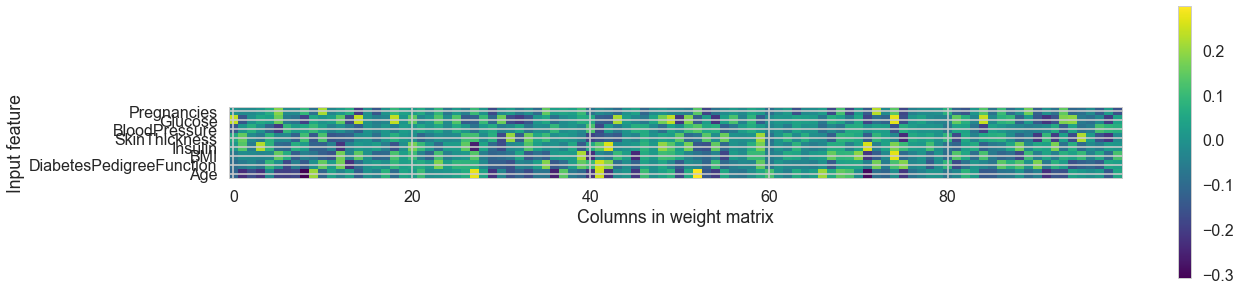

In [131]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()